<a target="_blank" href="https://colab.research.google.com/github/phitter-hub/phitter-kernel/blob/main/examples/fit_discrete.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TUTORIAL: ANALYSIS OF PROBABILITY DISTRIBUTION OF GALTON BOAARD'S SIMULATION**

In [21]:
import os
import sys

import numpy

In [22]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../../")

In [23]:
import phitter

**Simulate Galton Board Process**

In [24]:
def simulate_galton_board(num_marbles: int, num_levels: int) -> numpy.ndarray:
    positions = numpy.zeros(num_marbles)
    for _ in range(num_levels):
        steps = numpy.random.choice([-0.5, 0.5], size=num_marbles)
        positions += steps
    positions -= positions.min()
    return positions

data = simulate_galton_board(100000, 12)

**Initialize the PHITTER model**

In [25]:
phi = phitter.Phitter(
    data=data,
    fit_type="discrete",
)
phi.fit()

**Get best distribution**

In [26]:
phi.best_distribution

{'id': 'binomial', 'parameters': {'n': 12, 'p': 0.5005216659278497}}

**Summarize**

In [27]:
phi.summarize()

,distribution,aic,bic,parameters,chi_square,kolmogorov_smirnov
0,binomial,393405.836282,393424.862133,"n: 12, p: 0.5005",✅,✅
1,hypergeometric,395404.513086,395433.051862,"N: 89, K: 37, n: 15",✖️,✖️
2,poisson,413583.030703,413592.543628,lambda: 6,✖️,✖️
3,uniform,512993.871492,513012.897343,"a: 0, b: 12",✖️,✖️
4,geometric,575136.671462,575146.184388,p: 0.1667,✖️,✖️
5,logarithmic,664009.273321,664018.786247,p: 0.946,✖️,✖️


**Get distrbutions sorted by sse**

In [28]:
phi.df_sorted_distributions

distribution passed            aic            bic           parameters  \
                                                                              
0        binomial      ✅  393405.836282  393424.862133     n: 12, p: 0.5005   
1  hypergeometric     ✖️  395404.513086  395433.051862  N: 89, K: 37, n: 15   
2         poisson     ✖️  413583.030703  413592.543628            lambda: 6   
3         uniform     ✖️  512993.871492  513012.897343          a: 0, b: 12   
4       geometric     ✖️  575136.671462  575146.184388            p: 0.1667   
5     logarithmic     ✖️  664009.273321  664018.786247             p: 0.946   

      chi_square                                   kolmogorov_smirnov  \
  test_statistic critical_value   p_value rejected     test_statistic   
0       9.434136      18.307038  0.491457    False           0.002108   
1    1937.376728      16.918978  0.000000     True           0.047838   
2   15133.156432      19.675138  0.000000     True           0.091316   
3  109747.442220      18.307038  0.000000     True           0.234732   
4            NaN            NaN       NaN     None           0.347662   
5            NaN            NaN       NaN     None           0.500531   

                                     
  critical_value   p_value rejected  
0       0.004293  0.765053    False  
1       0.004293  0.000000     True  
2       0.004293  0.000000     True  
3       0.004293  0.000000     True  
4       0.004293  0.000000     True  
5       0.004293  0.000000     True

**Get parameters by `id_distribution`**

In [29]:
phi.get_parameters("binomial")

{'n': 12, 'p': 0.5005216659278497}

**Get sum squared error by `id_distribution`**

In [30]:
phi.get_sse("binomial")

7.658562403066468e-06

**Get results kolmogorov smirnov test by `id_distribution`**

In [31]:
phi.get_test_kolmogorov_smirnov("binomial")

{'test_statistic': 0.0021079244561055255,
 'critical_value': 0.004293014618329405,
 'p_value': 0.7650532991989434,
 'rejected': False}

**Plot a histogram of the dataset values to visualize the distribution**

In [32]:
phi.plot_histogram()

**Plot histogram and compare with N distributions**

In [33]:
phi.plot_histogram_distributions()

**Plot the histogram along with the `id_distribution` distribution curve for comparison**

In [34]:
phi.plot_distribution("binomial")

**Generate an empirical cumulative distribution function (ECDF) plot for the data**

In [35]:
phi.plot_ecdf()

**Plot the ECDF to visualize how closely the dataset values follow a `id_distribution`**

In [36]:
phi.plot_ecdf_distribution("binomial")

**Create a QQ plot for the `id_distribution` to check the quantiles against a `id_distribution`**

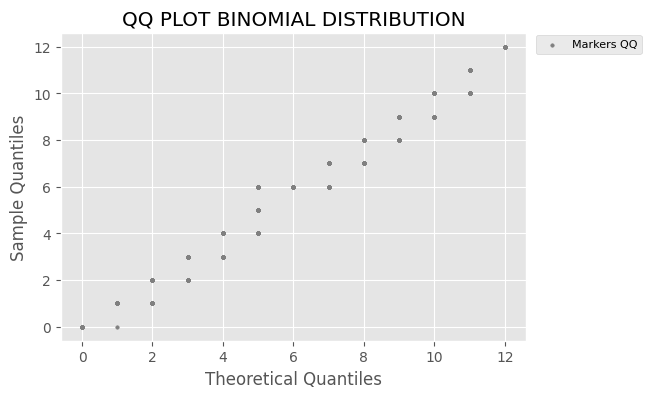

In [37]:
phi.qq_plot("binomial")

**Generate a QQ plot with a regression line for the `id_distribution` to assess normality through quantile comparisons**

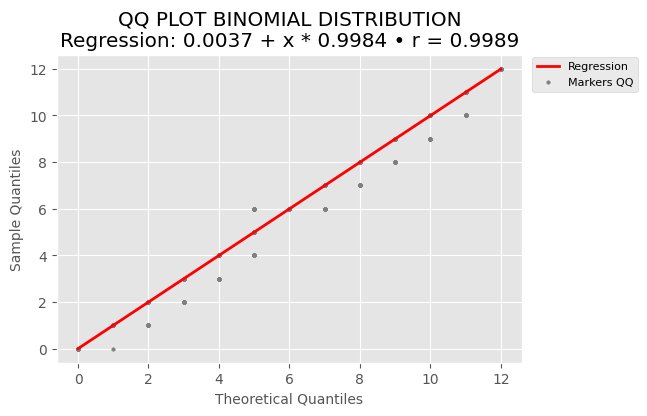

In [38]:
phi.qq_plot_regression("binomial")